## Mini Project Rakamin Academy <br>

## Investigate Hotel Business Using Data Visualization

## create by  : Mohd Fauzan Heryka Putra 

---- 

# Project Outline : 
- overview 
- import library
- load dataset 
- data exploration
- data cleansing
- data visualization

## Overview


Business performance analysis is a crucial component in helping firms succeed in their endeavors. Businesses can do analyses to determine their issues, vulnerabilities, and advantages. In the hospitality industry, it's critical to comprehend client behavior. Businesses can learn what influences customers' decisions to book hotels by analyzing customer behavior. In addition, businesses can determine which goods or services aren't doing well in the marketplace. This is done to make necessary adjustments to corporate plans so that organizations can enhance customer satisfaction and meet long-term objectives.

In [1]:
# library dataset &visual data
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
%matplotlib inline

# add on
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
#sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("darkgrid")
sns.color_palette("dark")
plt.style.use("default")

In [288]:
df = pd.read_csv("hotel_bookings_data.csv")
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
64623,City Hotel,1,138,2019,May,11,13,1,4,2,...,2,No Deposit,9.0,NaN,0,Personal,75.68,0,1,Canceled
78528,City Hotel,0,11,2017,December,41,9,1,2,2,...,0,No Deposit,9.0,NaN,0,Contract,139.33,0,1,Check-Out
100111,City Hotel,0,80,2018,December,43,19,0,4,2,...,0,No Deposit,14.0,NaN,0,Personal,128.70,0,0,Check-Out
116480,City Hotel,0,195,2019,September,29,16,2,3,2,...,0,No Deposit,9.0,NaN,0,Personal,89.10,0,1,Check-Out
78069,City Hotel,0,16,2017,December,40,1,0,2,3,...,1,No Deposit,9.0,NaN,0,Contract,142.00,0,4,Check-Out


## 1. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
display(df.describe().T, df.describe(include= "object"))

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [5]:
df.isnull().sum().sort_values(ascending=False)/len(df) *100 

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

In [6]:
pd.set_option('display.max_colwidth', 1)
# data uniq di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

uniq_val = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniq_val

,Column Name,Number of Unique,Unique Sample
0,hotel,2,"[Resort Hotel, City Hotel]"
1,is_canceled,2,"[0, 1]"
2,lead_time,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, ...]"
3,arrival_date_year,3,"[2017, 2018, 2019]"
4,arrival_date_month,12,"[September, October, November, December, January, February, March, April, May, June, July, August]"
5,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_weekdays_nights,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


## - Info Data
- Overall this dataset has 119390 rows and 29 features <br>
# - Missing value
- If we see missing values from the company feature 94%, agent 13%, city 0.4% and children 0.03% then we will handle the null value..
# - Handling tipe data 
- If you look at the data type, the children, company, agent features seem to need to be changed to int rather than float to become a compact number.
# - Handling inccorect data
- The meal feature has several unique values so it will be simplified to `with meal` or `no meal`.
- For distribution channel features that have a unique value of `undefined`, they will be replaced with the channels that are most frequently used later.
- for the market segment feature, it will also replace the value `undefined` with the most market segment later.

# - Feature grouping
- in the separate features `adult`, `children`, `babies` become total guests, and for the features `stays weekday`, `stay weekend` the total duration will be combined into one unified feature, then carry out further analysis to see if data anomalies occur after merging features.

## 2. Data processing

In [289]:
# handling missing value 
df_clean = df.copy()
null = ["company", "agent", "children"]
for i in null :
    df_clean[i].fillna(0, inplace= True)

# impute with mode
df_clean["city"].fillna(df_clean.city.mode()[0], inplace= True)

df_clean.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

fill in nan values such as `company` and `agent` use the value 0 because the assumption is that the customer does not book a hotel with these two features. then to fill in the null value for city using `mode`. to fill in the nan value in the `children` feature it will use the value 0 with the assumption that it has no children

In [290]:
# correct type data
int_val = ["company", "agent", "children"]
df_clean[int_val] = df_clean[int_val].astype("int64")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [291]:
# handling incorect value
# for the meal feature it will be filled with no meal with the assumption that undefined means the customer does not eat at the hotel
df_clean["meal"] = df_clean.meal.replace("Undefined", "No Meal")

# simplifying the 3 values "to be with meal"
df_clean.meal.replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

# for the two features below the value undefined, the mode for each feature will be filled in
df_clean["distribution_channel"] = df_clean.distribution_channel.replace("Undefined", "TA/TO")
df_clean["market_segment"] = df_clean.market_segment.replace("Undefined", "Online TA")


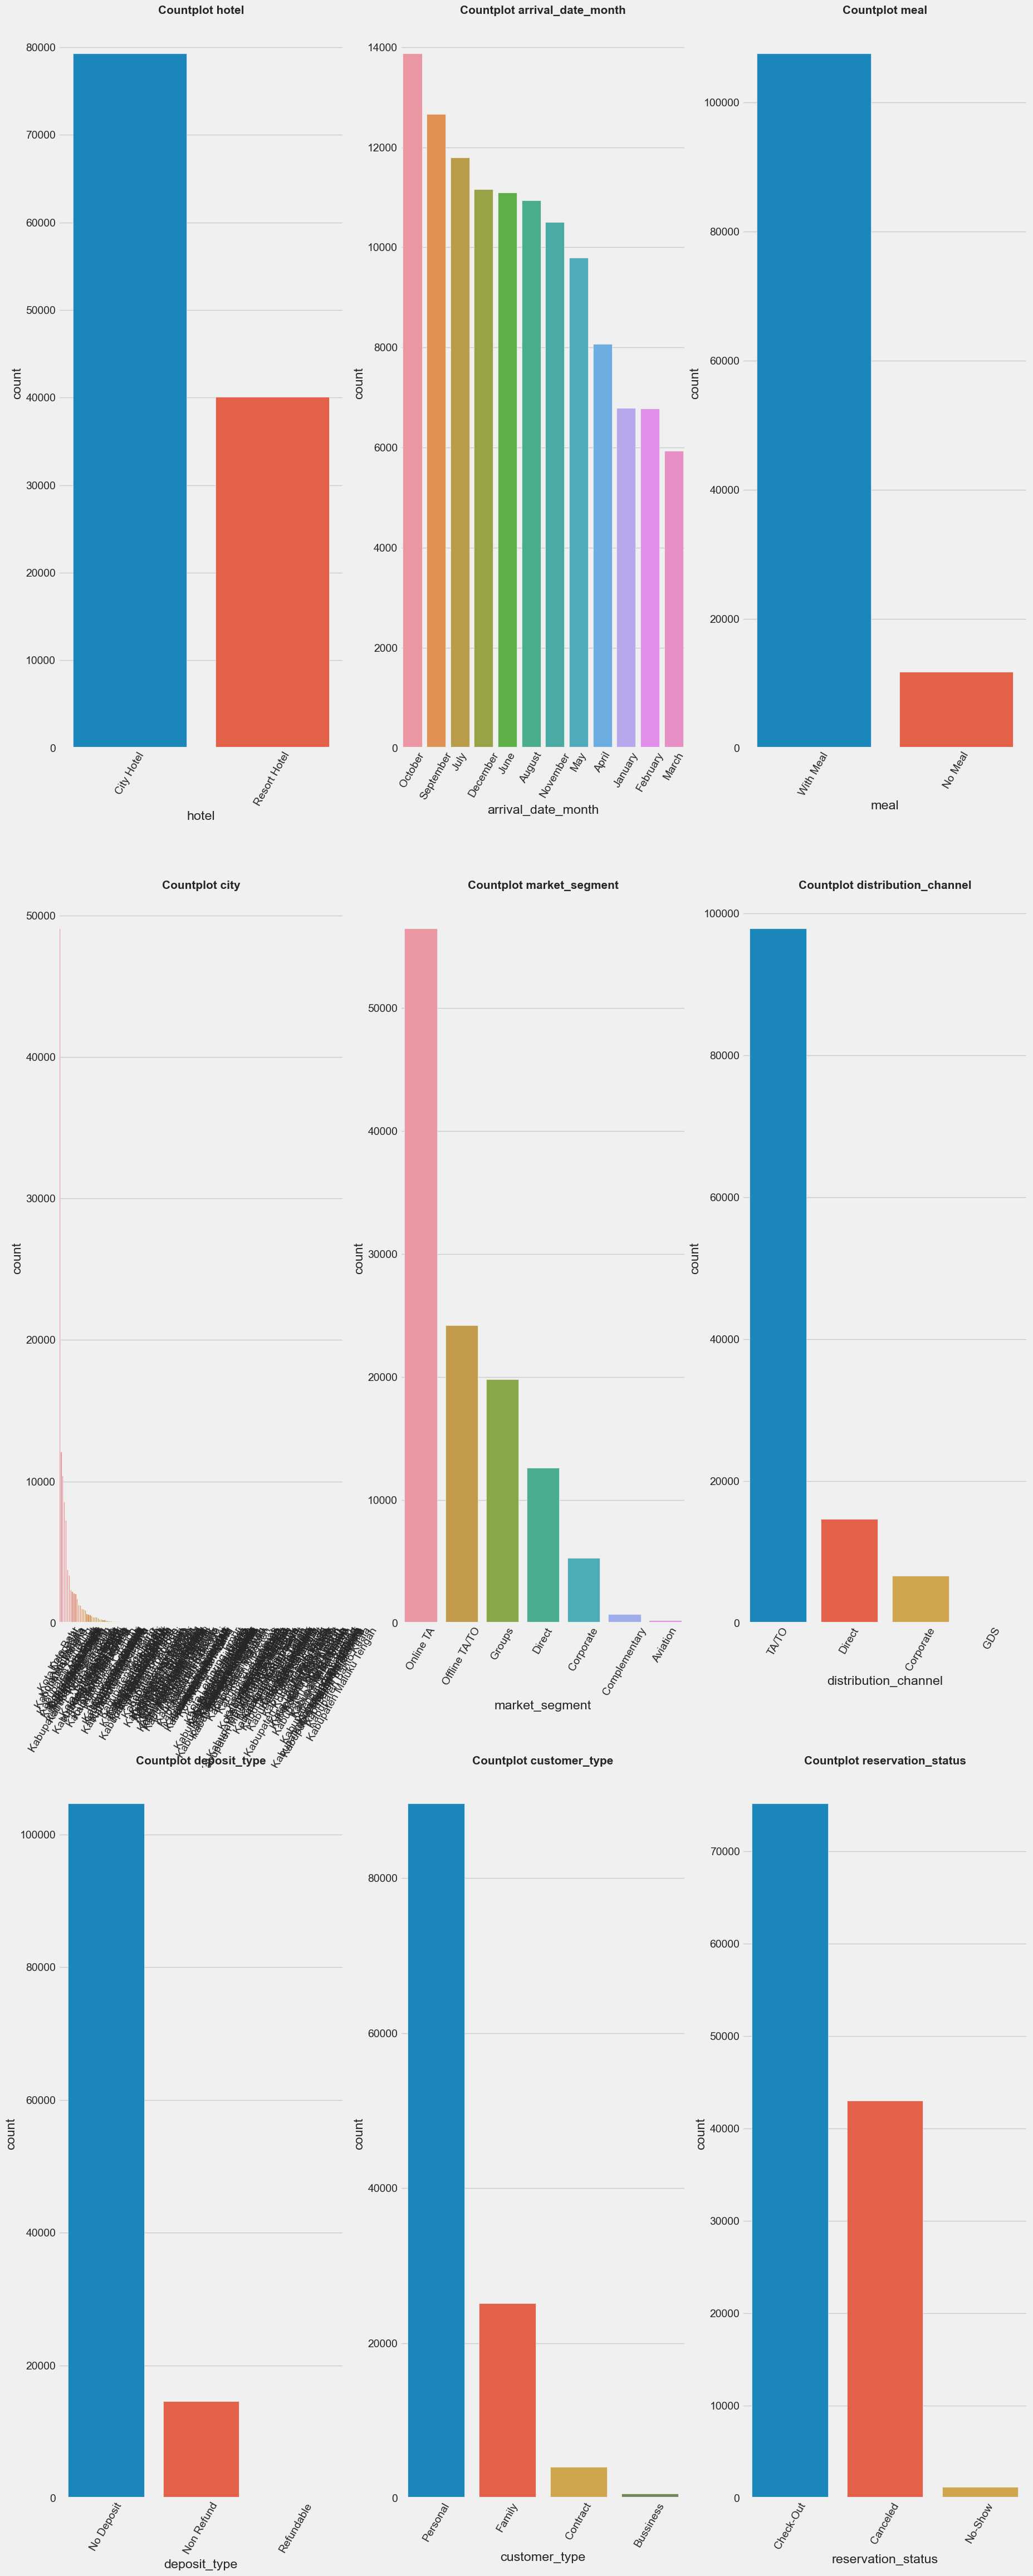

In [6]:
# check whether there is an undefined value missed
kat = list(df_clean.select_dtypes("object"))
plt.figure(figsize=(20, 55))
for i in range (0, len(kat)):
  plt.subplot(math.ceil(len(kat)/3),3, i+1)
  sns.countplot(x=df_clean[kat[i]], order = df_clean[kat[i]].value_counts().index)
  plt.title('Countplot {}'.format(kat[i]), fontsize = 15 , fontweight = "bold")
  plt.xticks(rotation = 60)

It can be seen from the categorical feature that the available data is quite clean, and then we will clean the numerical data

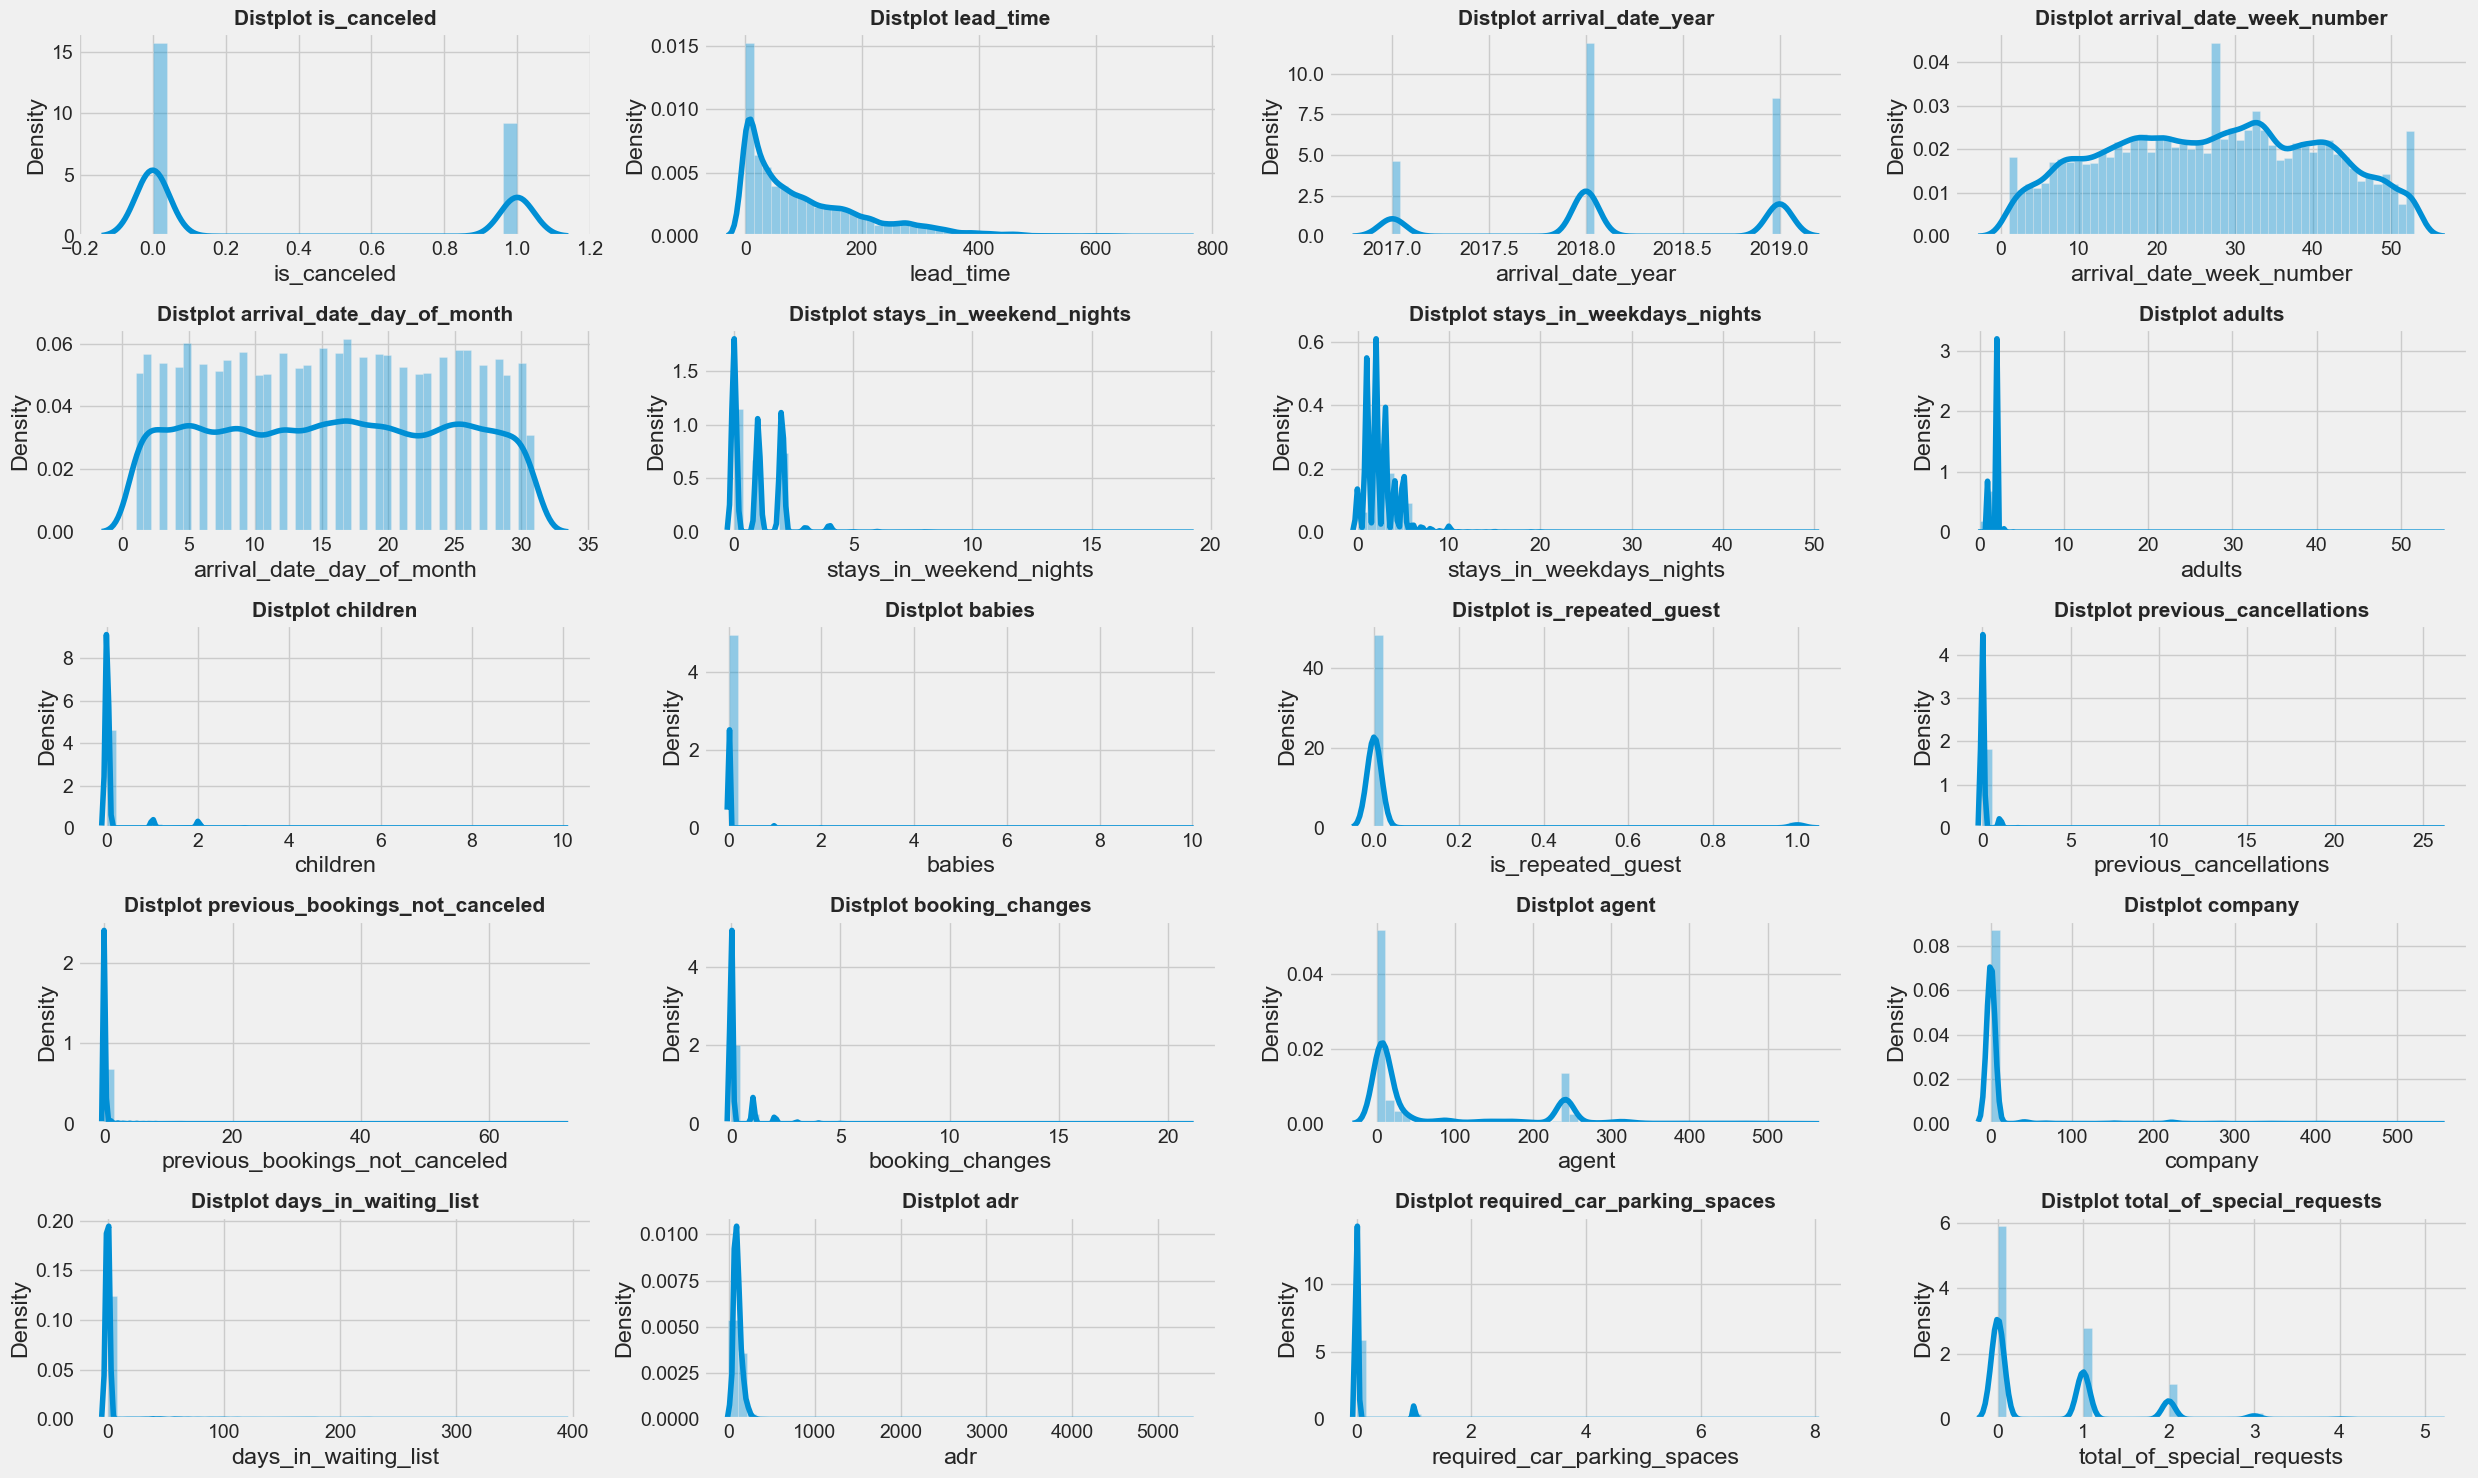

In [34]:
# distribution of numerical features
num = list(df_clean.select_dtypes(["int64","float64"]))
plt.figure(figsize=(25, 15))
for i in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/4),4, i+1)
    sns.distplot(df_clean[num[i]])
    plt.title('Distplot {}'.format(num[i]), fontsize=15, fontweight='bold')
    plt.tight_layout()

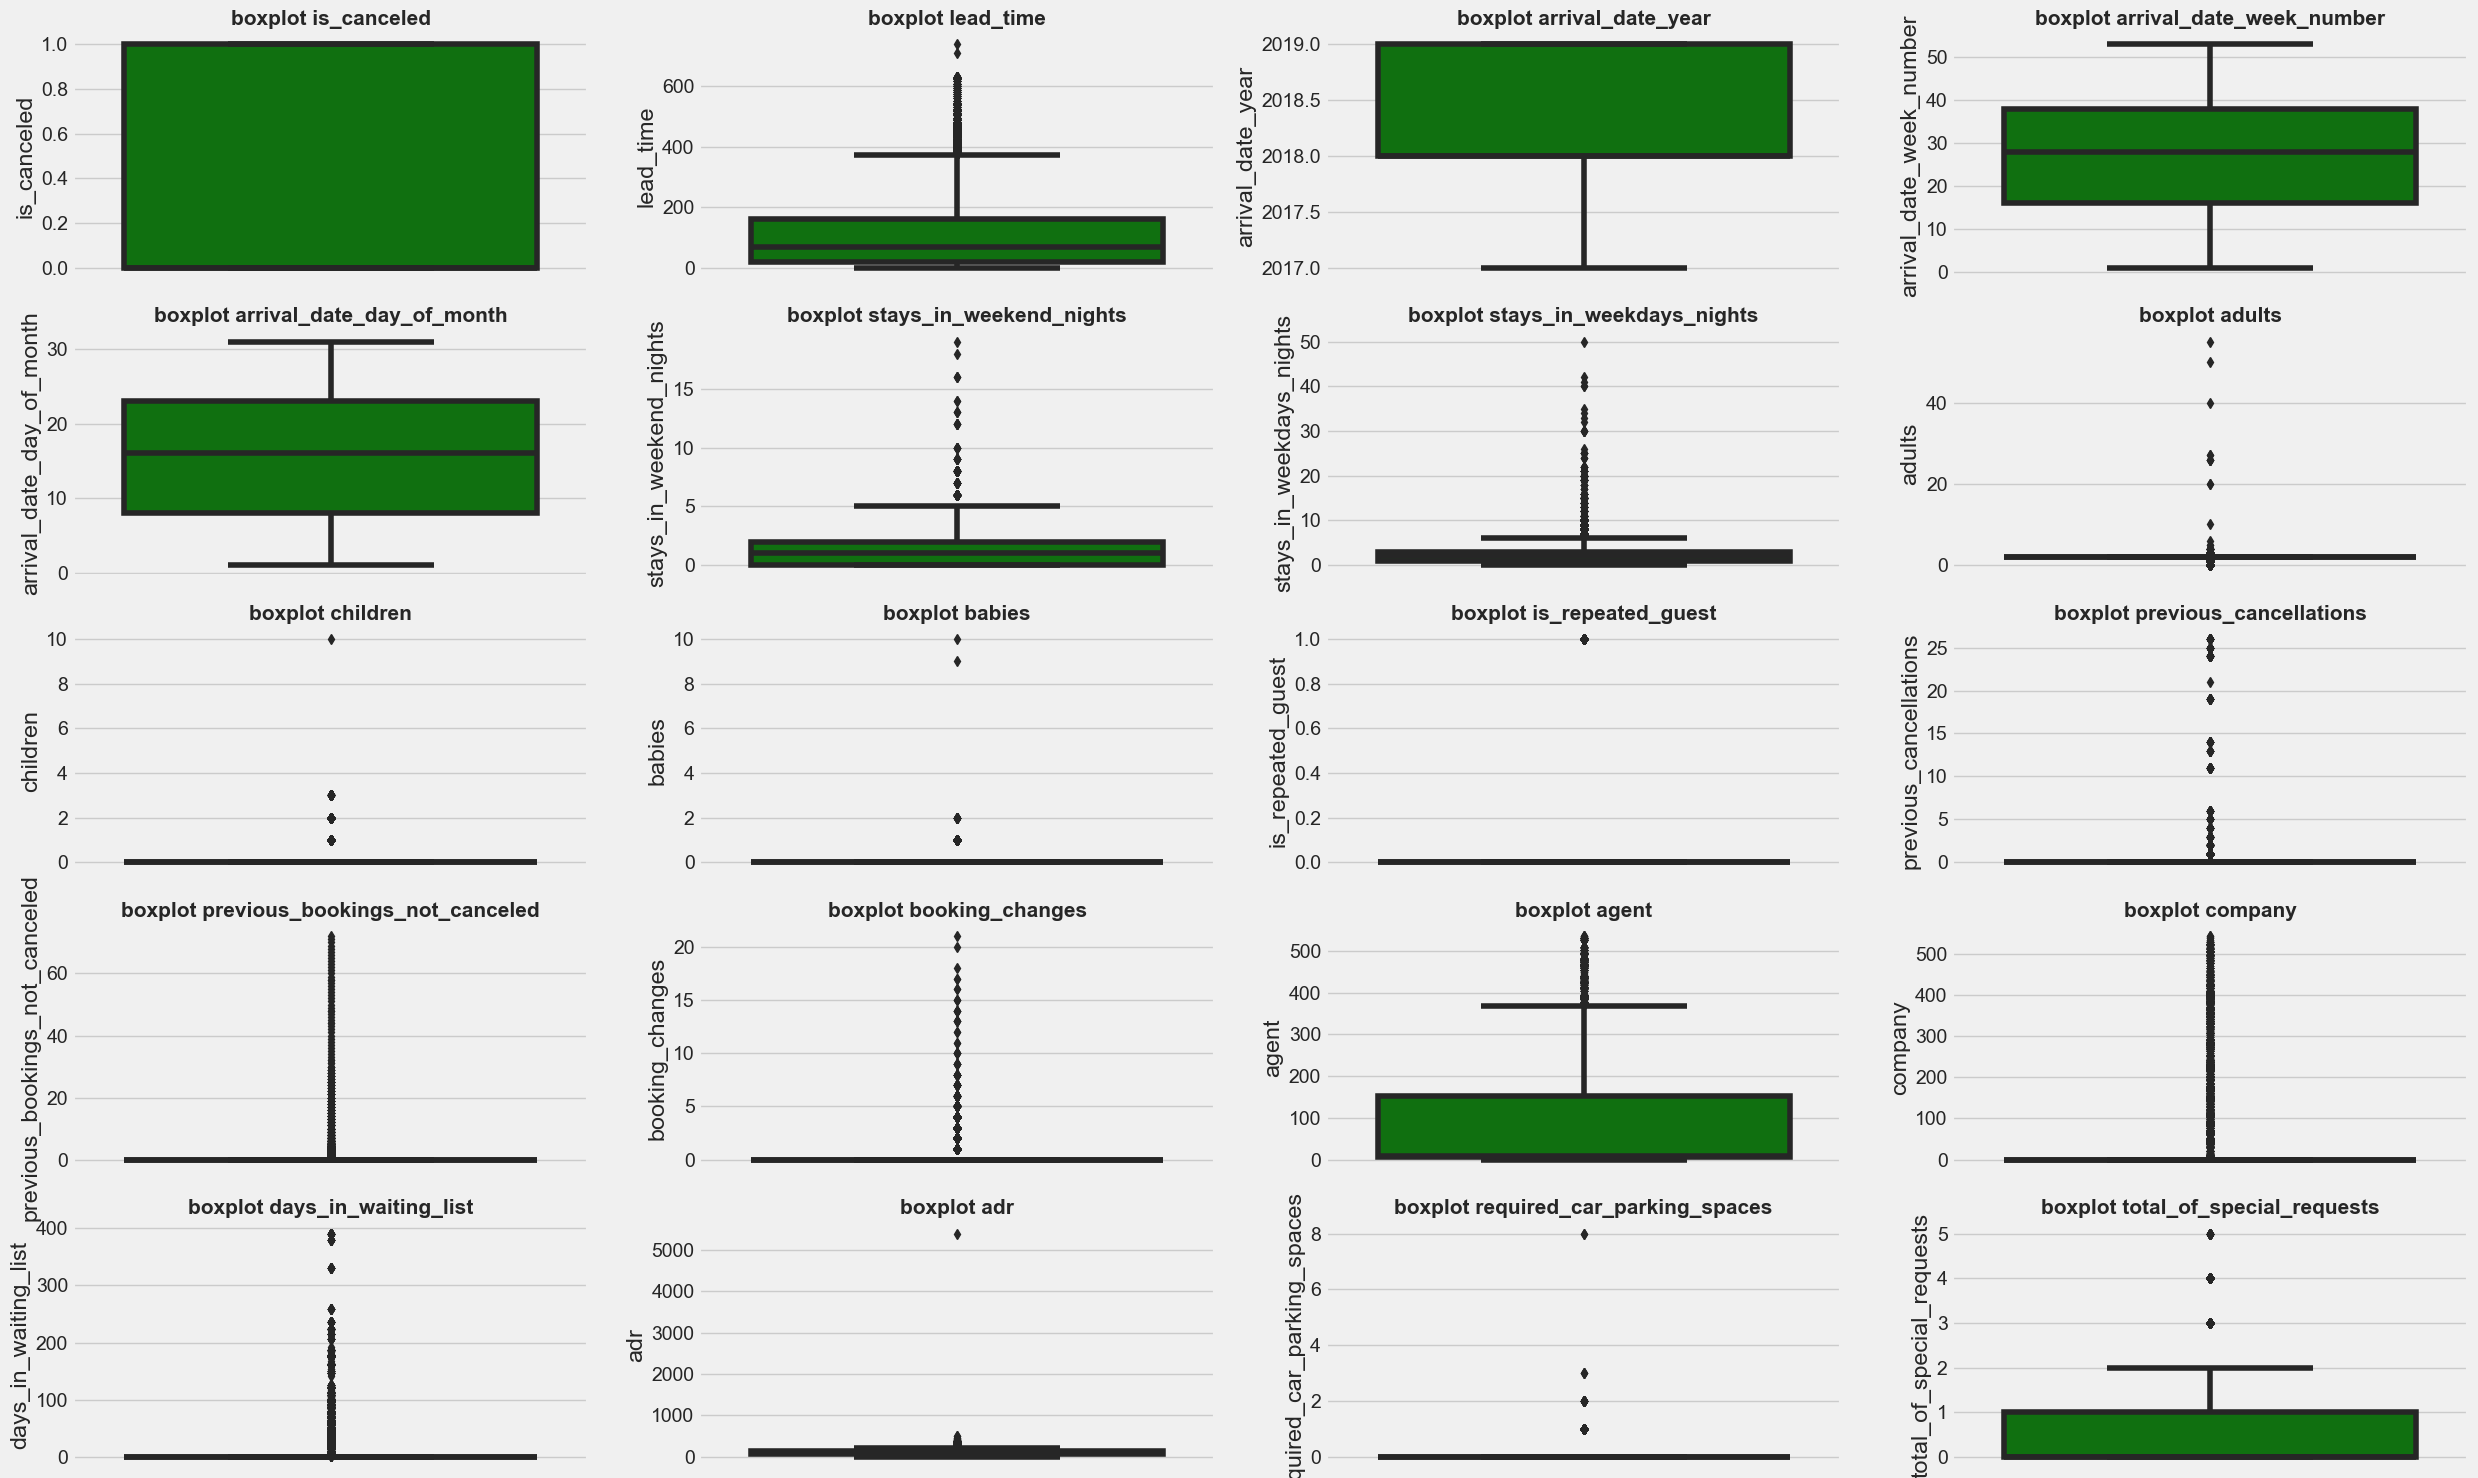

In [35]:
# check outlier data
plt.figure(figsize=(25,15))
for i in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/4), 4 , i+1)
    sns.boxplot(y=df_clean[num[i]], color='g')
    plt.title("boxplot {}".format(num[i]), fontsize=15, fontweight='bold')
    plt.tight_layout()

In [292]:
# make sure outliers such as adr, required parking space, babies, children
#df_clean.columns
check_outlier = ['children','babies','required_car_parking_spaces','adr']
for i in check_outlier :
    print(f'''Value count columns {i}:''')
    print(df_clean[i].value_counts())
    print()

Value count columns children:
children
0     110800
1       4861
2       3652
3         76
10         1
Name: count, dtype: int64

Value count columns babies:
babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64

Value count columns required_car_parking_spaces:
required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64

Value count columns adr:
adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64



Features like `{children}`, `{babies}`, and `{required parking space} `are confirmed to be input errors because they only have one value each, and the input data is illogical. However, features like `{adr (average daily rate)} `have anomalies data with value 0, indicating that there is no fee when paying for a hotel stay.

## Result :

- from the distplot visualization, all features tend to be positively skewed and also some features have a bimodal distribution
- From the boxplot, almost all features have outliers, but there are some that are collective outliers. several features such as `children`, `babies`, `car parking spaces`, `adr` need outlier handling because they already have extreme outlier indications/data input errors.
- The two visualizations above can be convincing to combine features such as `adult`, `children`, `babies` into one feature `total_guest` into total guests because it is certain that customers such as children babies will stay with their parents.
- to make visualization easier, we will combine features such as `weekend night` and `weekeday night` into one feature `total_duration`.
- After merging the features, the data will be cleaned, namely removing the value 0, namely there are no guests staying overnight to prevent data anomalies.

In [293]:
df_clean1 = df_clean.copy() # copy data ver 1 
# parking clean data
parking_clean = df_clean[df_clean.required_car_parking_spaces == 8]
df_clean1.drop(index= parking_clean.index, inplace= True)

# babies clean data 
babies_clean = df_clean[df_clean.babies >= 9]
df_clean1.drop(index=babies_clean.index, inplace= True)

# children clean data
children_clean = df_clean[df_clean.children == 10]
df_clean1.drop(index= children_clean.index, inplace= True)

# adr cleaning data 
adr_clean = df_clean[(df_clean.adr <= 0) |  (df_clean.adr >=50000)]
df_clean1.drop(index= adr_clean.index, inplace= True)


In [294]:
# check for outliers that have been removed
for i in check_outlier :
    print(f'''Value count columns {i}:''')
    print(df_clean1[i].value_counts())
    print()

Value count columns children:
children
0    108928
1      4807
2      3615
3        75
Name: count, dtype: int64

Value count columns babies:
babies
0    116535
1       875
2        15
Name: count, dtype: int64

Value count columns required_car_parking_spaces:
required_car_parking_spaces
0    110119
1      7275
2        28
3         3
Name: count, dtype: int64

Value count columns adr:
adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
80.00     1888
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8876, dtype: int64



In [295]:
# grouping feature total guest dan total duration 
df_clean2 = df_clean1.copy() # melakukan copy data ver 2
df_clean2["total_guest"] = df_clean1.adults + df_clean1.children + df_clean1.babies
df_clean2["total_stay_duration"] = df_clean1.stays_in_weekdays_nights + df_clean1.stays_in_weekend_nights
print("0 guest : total before cleaning {} data ".format(df_clean2[df_clean2.total_guest == 0].shape[0]))
print("0 duration night : total before {} data ".format(df_clean2[df_clean2.total_stay_duration == 0].shape[0]))
print("total data before processing {}". format(df_clean2.shape[0]))

# remove 0 value which means there are no guests staying 
no_guest = df_clean2[df_clean2.total_guest == 0]
df_clean2.drop(index= no_guest.index, inplace= True) 
#no_stay = df_clean2[df_clean2.total_stay_duration == 0]
#df_clean2.drop(index= no_stay.index, inplace= True)
print("0 guest : total after cleaning {} data ".format(df_clean2[df_clean2.total_guest == 0].shape[0]))
#print("0 duration night : total after cleaning {} data ".format(df_clean2[df_clean2.total_stay_duration == 0].shape[0]))
print("total data after processing {}". format(df_clean2.shape[0]))

0 guest : total before cleaning 31 data 
0 duration night : total before 0 data 
total data before processing 117425
0 guest : total after cleaning 0 data 
total data after processing 117394


In [9]:
# duplicated data
df_clean2.duplicated().sum()
df_clean2[df_clean2.duplicated(keep= "first")]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_stay_duration
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.00,0,1,Check-Out,2,2
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,250,0,0,Personal,84.67,0,1,Check-Out,2,6
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,...,250,0,0,Personal,137.00,0,1,Check-Out,2,5
138,Resort Hotel,1,5,2017,September,28,5,1,0,2,...,240,0,0,Personal,97.00,0,0,Canceled,2,1
200,Resort Hotel,0,0,2017,September,28,7,0,1,1,...,240,0,0,Personal,109.80,0,3,Check-Out,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2019,October,35,31,0,3,2,...,9,0,0,Personal,126.00,0,2,Check-Out,2,3
119352,City Hotel,0,63,2019,October,35,31,0,3,3,...,9,0,0,Family,195.33,0,2,Check-Out,3,3
119353,City Hotel,0,63,2019,October,35,31,0,3,3,...,9,0,0,Family,195.33,0,2,Check-Out,3,3
119354,City Hotel,0,63,2019,October,35,31,0,3,3,...,9,0,0,Family,195.33,0,2,Check-Out,3,3


## Result : 
There is no unique booking code in the dataset so it is difficult to determine whether this data is duplicate or not, because it could be that the data contains important information, it's just that the booking time is different, so this data will not be deleted.

## 3. Data Visualization

## Monthly Hotel Booking Analysis Based on Hotel Type

Text(0.5, 1.0, 'Percentage Of Hotel Type Bookings ')

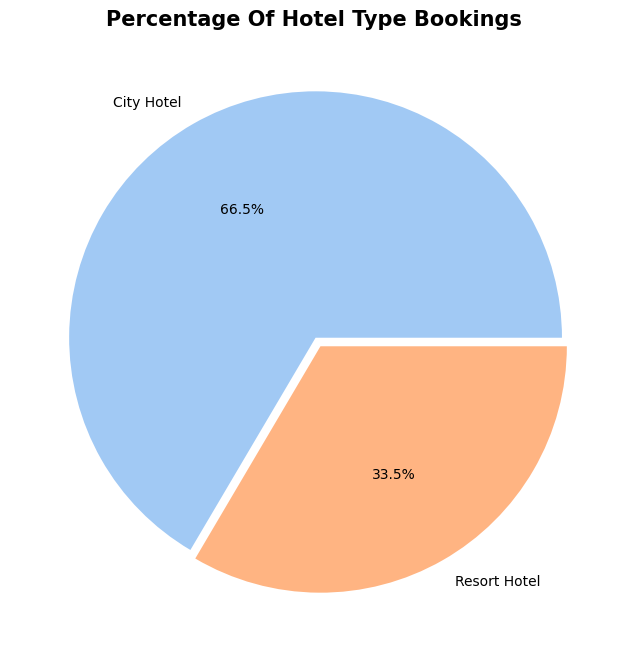

In [296]:
df_viz = df_clean2.copy() # copy data 

plt.figure(figsize=(8,8))
df_viz["hotel"].value_counts().plot(kind="pie",colors= sns.set_palette("pastel") ,autopct='%1.1f%%',
                                    explode= [0.02,0.02], textprops={'color':"black"})
plt.ylabel("")
plt.title("Percentage Of Hotel Type Bookings ", fontsize = 15, loc="center",
          fontweight = "bold")

## Insight : 
- Tourists prefer staying at city hotels over resort hotels. The pie chart above illustrates this, showing that compared to resort hotels, city hotels have about 66% more customers overall.
- City hotels are more popular because they offer a number of benefits. For example, being in the heart of the city makes them the most visible to foreign visitors, and since some of their patrons are there on business rather than for pleasure, they appear cozier and more convenient. for foreigners arriving outside of the city.
- The benefit of resort hotels, which are typically found on the outskirts of towns, is that they provide the typical tourist with a vacation spot where they can enjoy views of the mountains, sea, and forest.

Source [article](https://www.littlehotelier.com/blog/running-your-property/difference-between-hotel-resort/)


# sort month

When exploring the data, it can be seen that the months displayed are not in order, so they are sorted first to make visualization easier later

In [297]:
df_viz["arrival_date_month"] = pd.Categorical(df_viz["arrival_date_month"].str[:3],
                             categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                                         "Aug", "Sep", "Oct", "Nov", "Dec"],
                             ordered=True)

In [298]:
df_group = df_viz.groupby(["hotel","arrival_date_month"])["arrival_date_year"].agg(["nunique","count"]).reset_index()
df_group

,hotel,arrival_date_month,nunique,count
0,City Hotel,Jan,2,4260
1,City Hotel,Feb,2,4006
2,City Hotel,Mar,2,3669
3,City Hotel,Apr,2,4873
4,City Hotel,May,2,6365
5,City Hotel,Jun,2,7405
6,City Hotel,Jul,2,8118
7,City Hotel,Aug,2,7814
8,City Hotel,Sep,3,7976
9,City Hotel,Oct,3,8858


After doing groupby, it turns out that this data has an inconsistency where the average data has a `uniq value of 2` but there is a `uniq value of 3`. To overcome this, we will carry out normalization by finding the average so that we have the right comparison.

In [299]:
df_group["average_booking"] = round(df_group["count"] / df_group["nunique"])
df_group

,hotel,arrival_date_month,nunique,count,average_booking
0,City Hotel,Jan,2,4260,2130.0
1,City Hotel,Feb,2,4006,2003.0
2,City Hotel,Mar,2,3669,1834.0
3,City Hotel,Apr,2,4873,2436.0
4,City Hotel,May,2,6365,3182.0
5,City Hotel,Jun,2,7405,3702.0
6,City Hotel,Jul,2,8118,4059.0
7,City Hotel,Aug,2,7814,3907.0
8,City Hotel,Sep,3,7976,2659.0
9,City Hotel,Oct,3,8858,2953.0


Text(7.5, 4600, 'School days')

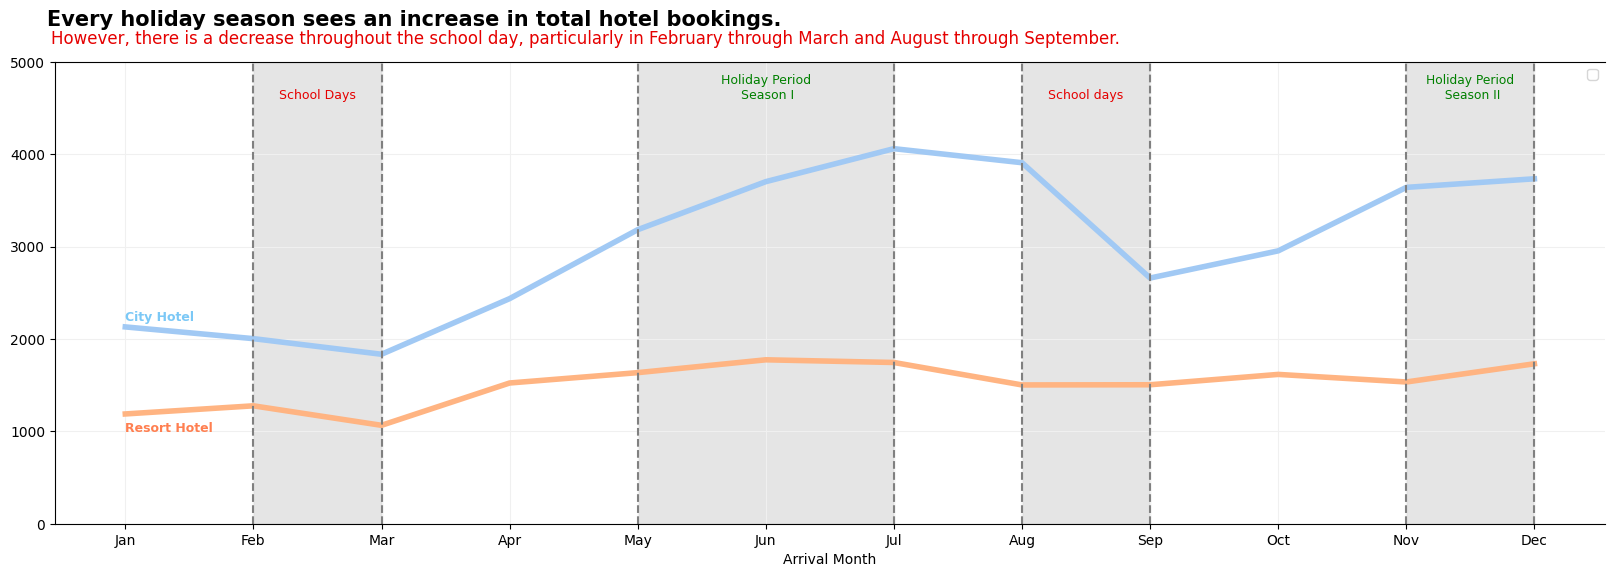

In [300]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = (20,6))
ax.spines["right"].set_visible(False)



sns.lineplot(x='arrival_date_month', y='average_booking', hue='hotel', data= df_group, palette= sns.color_palette("pastel"), linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0,5000)
plt.ylabel("")
plt.xlabel("Arrival Month")


plt.legend([])
plt.text(x=0, y=2200, s='City Hotel', fontsize=9, color='#7BC8F6', ha='left', fontweight='bold')
plt.text(x=0, y=995, s='Resort Hotel', fontsize=9, color='#FF7F50', ha='left', fontweight='bold')


plt.text(y = 5200, x = -0.58, s = 'However, there is a decrease throughout the school day, particularly in February through March and August through September.',
         size=12, color = "#E50000")
plt.text(y = 5390, x = -0.61, s = 'Every holiday season sees an increase in total hotel bookings.',
         size=15, fontweight = "bold")

ax.axvline(1, ls='--', color='grey')
ax.axvline(2, ls='--', color='grey')
plt.stackplot([1,2], [5000], color='grey', alpha=0.2)
plt.text(x=1.5, y=4600, s='School Days', fontsize=9, color='#E50000', ha='center')


ax.axvline(4, ls='--', color='grey')
ax.axvline(6, ls='--', color='grey')
plt.stackplot([4,6], [5000], color='grey', alpha=0.2)
plt.text(x=5, y=4600, s='Holiday Period\n Season I', fontsize=9, color='g', ha='center')

ax.axvline(10, ls='--', color='grey')
ax.axvline(11, ls='--', color='grey')
plt.stackplot([10,11], [5000], color='grey', alpha=0.2)
ax.text(x=10.5, y=4600, s='Holiday Period\n Season II',ha = "center",fontsize=8.8, color='green')

ax.axvline(7, ls='--', color='grey')
ax.axvline(8, ls='--', color='grey')
plt.stackplot([7,8], [5000], color='grey', alpha=0.2)
plt.text(x=7.5, y=4600, s='School days', fontsize=9, color='#E50000', ha='center')


## Interpretation

- The trend chart analysis of average reservations for two categories of hotels—city hotels and resort hotell is displayed in the graph above.
- Due to the fact that most visitors travel with their children during school breaks, which occur during the months of February through March and August through September, there is a decrease in both types of hotels during these school-related periods. Overall, though, hotel reservations peaked in February and March, when they were **lowest**. This could have been because kids are starting a new school year. [Source Article](https://nasional.kontan.co.id/news/musim-libur-berakhir-tingkat-hunian-kamar-hotel-turun-1204-pada-januari-2023)
- A marketing plan is required to boost hotel reservations in order to overcome Providing restaurant and ballroom services in partnership with EO/WO is one of the few suggested approaches. For loyal customers who frequently visit throughout the holidays, provide loyalty programs. For example, send emails informing them of exclusive deals and award points to attract their curiosity. [Link article](https://www.ezeeabsolute.com/blog/increase-low-season-hotel-occupancy/)
- The trend chart shows that during the holidays, there is a consistent increase in the number of hotel bookings in both seasons 1 and 2. This is because many children have class promotion holidays and Idul Fitri holidays during the first holiday season, which is the children's holiday, and Christmas and new year's holidays during the second holiday season. This explains why trend charts rise during the Christmas season. [travel.com](https://travel.detik.com/travel-news/d-6836895/libur-sekolah-usai-reddoorz-pecahkan-rekor-penjualan-kamar).
- There are a few strategies that might be suggested to boost hotel reservations during the second holiday season. Hotels could plan a number of entertaining activities for the Christmas and New Year holidays, such as crafting unique Christmas gifts like letters with good wishes. Customers may get the impression that the hotel values them in this way, which could have a long-term good impact such as making them loyal customers and possibly turning into a free advertisement for the hotel. A very satisfied customer is likely to post about their activities on social media.. [Link Article](https://prenohq.com/blog/11-christmas-marketing-strategies-for-hotels-to-try-in-2022/)

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [270]:
df_city = df_viz[df_viz.hotel == "City Hotel"]
df_resort = df_viz[df_viz.hotel == "Resort Hotel"]

df_city = df_city.groupby(["hotel","is_canceled"])["is_canceled"].count().reset_index(name= "total cancel order")
df_resort = df_resort.groupby(["hotel","is_canceled"])["is_canceled"].count().reset_index(name= "total cancel order")

change_val = {0 : "not Cancel",
              1 : "Cancel"}

df_city["is_canceled"] = df_city["is_canceled"].map(change_val) 
df_resort["is_canceled"] = df_resort["is_canceled"].map(change_val) 

display(df_resort, df_city)

,hotel,is_canceled,total cancel order
0,Resort Hotel,not Cancel,28267
1,Resort Hotel,Cancel,11037


,hotel,is_canceled,total cancel order
0,City Hotel,not Cancel,45117
1,City Hotel,Cancel,32973


Text(0.5, 1.0, 'Ratio Cancel Resort Hotel')

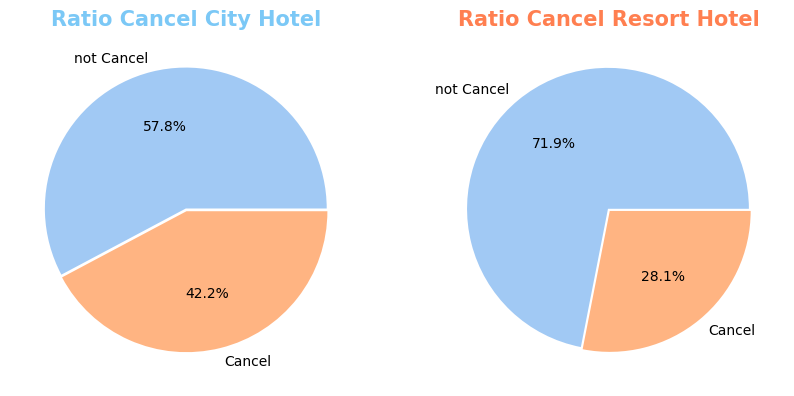

In [272]:
fig,ax = plt.subplots(1,2 ,figsize = (10,10))

ax[0].pie(df_city["total cancel order"],labels = df_city["is_canceled"],colors=sns.color_palette("pastel"),autopct='%.1f%%', explode= [0.01,0.01])
ax[1].pie(df_resort["total cancel order"],labels = df_resort["is_canceled"],colors=sns.color_palette("pastel"),autopct='%.1f%%', explode= [0.01,0.01])

ax[0].set_title("Ratio Cancel City Hotel", fontweight = "bold", fontsize = 15, color = "#7BC8F6", ha= "center")
ax[1].set_title("Ratio Cancel Resort Hotel", fontweight = "bold", fontsize = 15, color = "#FF7F50", ha= "center")

The two hotels have differing cancellation rates: the resort hotel has a rate of 28%, while the city hotel has a rate of 42%. It's shown in the diagram that these two hotels' cancellation rates are different for the resort hotel and the city hotel. We will look at the typical duration of stay for customers that cancel in order to conduct the further analysis required to make sure this doesn't happen again.

<Axes: xlabel='total_stay_duration', ylabel='Count'>

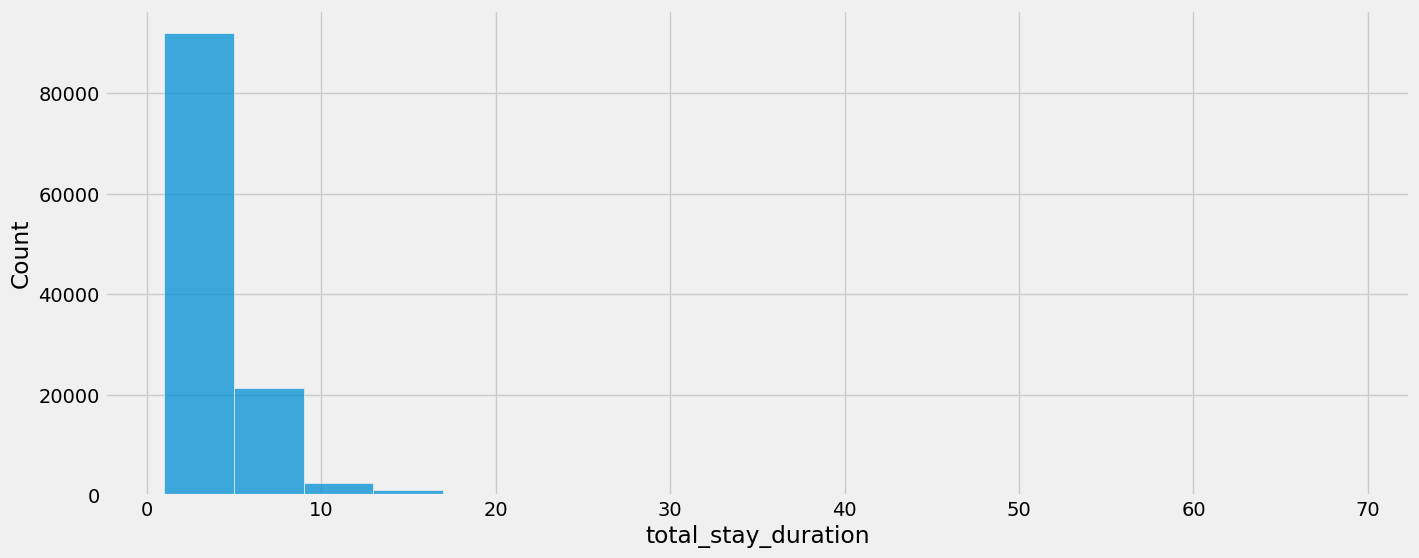

In [29]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,6))
sns.histplot(df_viz["total_stay_duration"], binwidth= 4)

bisa dilihat ternyata pada total stay duration memiliki banyak value, maka untuk mempermudah visualisasi makan akan disederhanakan agar interpretasi semakin tepat.

In [273]:
df3 = df_viz.copy()
df3["total_stay_duration"].value_counts()

total_stay_duration
2     27273
3     26931
1     20478
4     17309
7      8622
5      7754
6      3833
8      1148
10     1132
14      909
9       831
11      392
12      218
13      140
15       71
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
30       12
29       12
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
60        1
69        1
45        1
38        1
34        1
Name: count, dtype: int64

The total duration of stay ranges from 0 to 29 days. To facilitate interpretation, it will be created with weekly duration categories

- < 1 : 0 - 7 days
- 1 - 2 : 8 - 14 days
- 2 - 3 : 15 - 21 days
- 2 - 4 : 22 - 28 days
- ">" 4 : > 29 days

In [301]:
df3['Duration'] = df3['total_stay_duration'].apply(lambda x: '< 1' if x <= 7 else ('1-2' if x <= 14 else ('2-3' if x <=21 else('3-4' if x <=28 else "> 4"))))
df3["Duration"].value_counts()

Duration
< 1    112200
1-2      4770
2-3       273
3-4       108
> 4        43
Name: count, dtype: int64

In [302]:
cancel_order = df3.groupby(['hotel', 'Duration']).agg({'is_canceled' : 'sum', 'arrival_date_month' : 'count'}).reset_index()
cancel_order['cancel_rate'] = round(cancel_order['is_canceled'] / cancel_order['arrival_date_month'] *100)

cancel_order["Duration"] = pd.Categorical(cancel_order.Duration,
                                          categories=["< 1", "1-2","2-3","3-4","> 4"],
                                          ordered= True)
cancel_order = cancel_order.sort_values("Duration")
cancel_order

,hotel,Duration,is_canceled,arrival_date_month,cancel_rate
3,City Hotel,< 1,32298,76875,42.0
8,Resort Hotel,< 1,9835,35325,28.0
0,City Hotel,1-2,558,1064,52.0
5,Resort Hotel,1-2,1077,3706,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,168,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,21,95.0
9,Resort Hotel,> 4,7,22,32.0


Text(-0.5, 99, '\nResort hotels have a lower cancellation rate than City hotels, \nalthough both types of hotels must avoid this in order to avoid \nlosing money.\n')

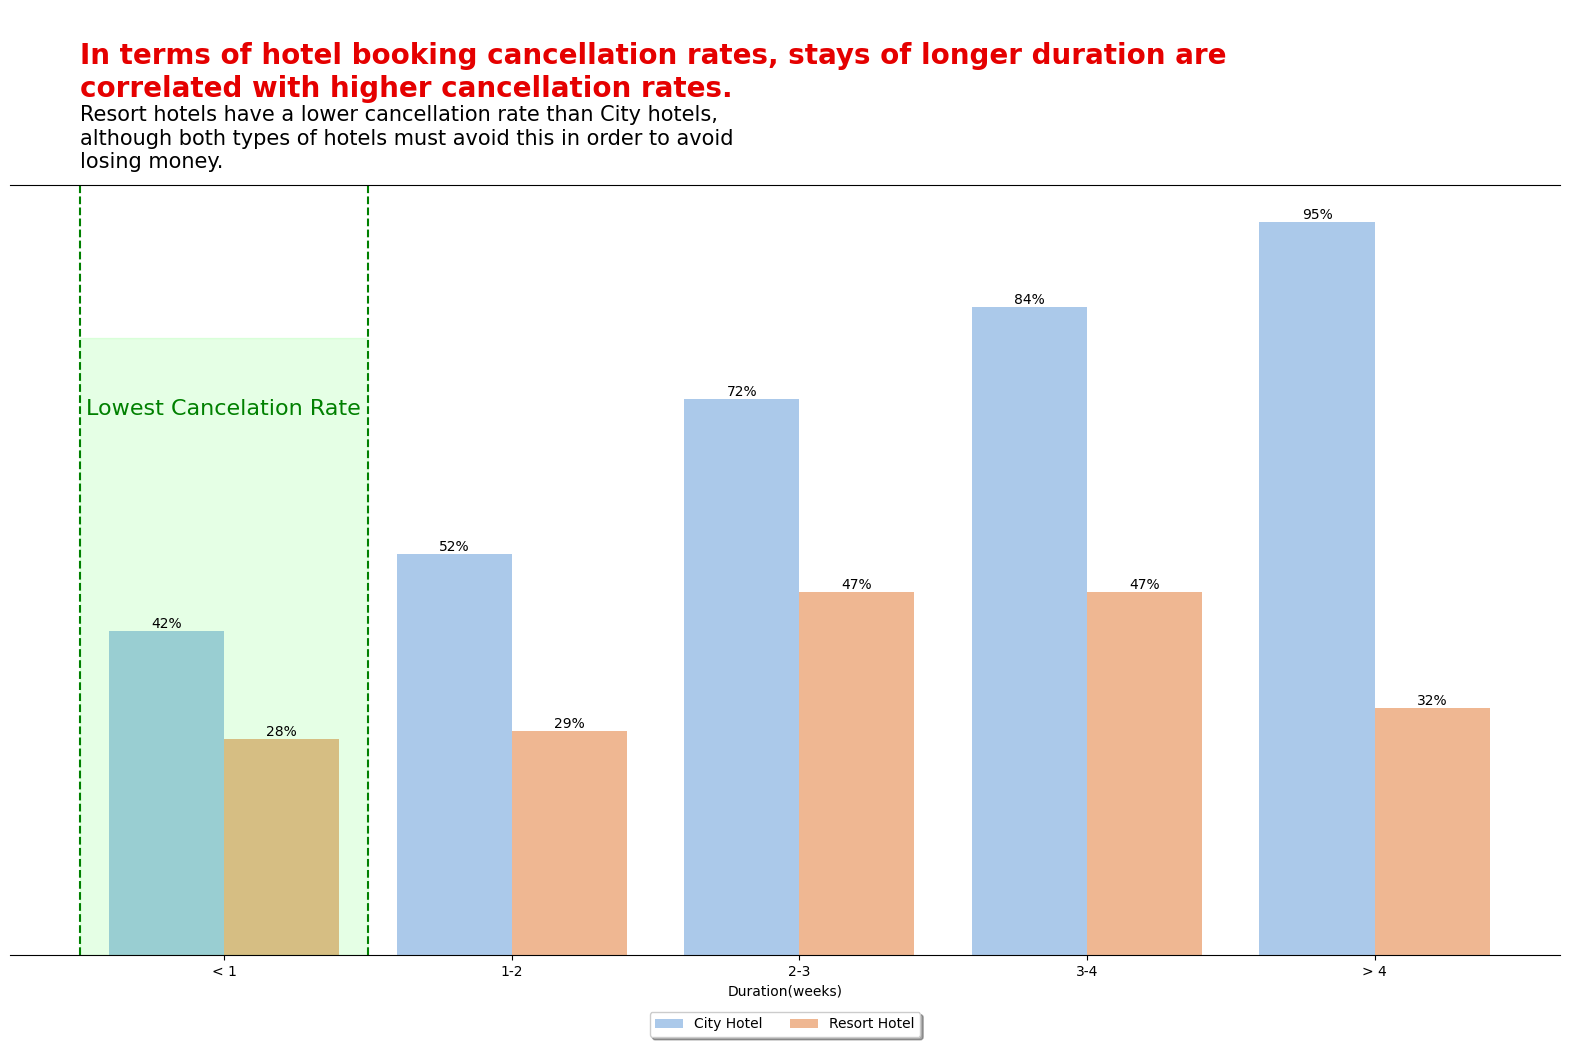

In [303]:
plt.figure(figsize= (20,10))
plt.style.use("default")

ax = sns.barplot(x = cancel_order['Duration'], y = cancel_order['cancel_rate'], hue=cancel_order['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=sns.color_palette("pastel"))

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.ylabel("")
plt.yticks([])
plt.xlabel("Duration(weeks)")
plt.legend(loc='center', bbox_to_anchor=(0.50, -0.09),
          fancybox=True, shadow=True, ncol=5)

ax.axvline(-0.5, ls='--', color='green')
ax.axvline(0.5, ls='--', color='green')
ax.stackplot(np.arange(-0.5,0.6),[[80]], color='lime', alpha=0.1)
ax.text(x=-0.48, y=70, s='Lowest Cancelation Rate', fontsize=16, color='green')
for i in ax.containers :
    ax.bar_label(i, fmt = '%.f%%')

tittle = """
In terms of hotel booking cancellation rates, stays of longer duration are\ncorrelated with higher cancellation rates.
"""

text = """
Resort hotels have a lower cancellation rate than City hotels, 
although both types of hotels must avoid this in order to avoid 
losing money.
"""

plt.text(y = 107, x = -0.5 , s = tittle,
         size=20, color = "#E50000", fontweight = "bold")

plt.text(y = 99, x = -0.5 , s = text,
         size=15, fontweight = "medium")

interpretation :

- The graph illustrates that the higher the cancellation rate, the longer the period of stay when placing an order. It is known that 95% of order cancellations for stays longer than one month occur in city hotels.
- Especially compared to city hotels, resort hotels generally have lower cancellation rates.
- If you look closely, you will see that the guest cancellation rate is rising after more than two weeks.
- If a guest rents a room with a stay duration of more than a week, it is preferable for them to make a hotel reservation for successive bookings before 7 days to avoid the high cancellation charge. The lowest cancellation rate is only available for bookings of less than a week.
- You are able to prevent this and avoid losing money by implementing room booking guidelines like these:
   - Suggest making a deposit in order to reserve a room.
   - There is no cancellation fee if cancellation is made at least one week prior to arrival.
   - A cancellation fee of 15% will be charged if made four to five days prior to the arrival date.
   - A cancellation fee of 50% will be imposed if made two to three days prior to the scheduled arrival date.
   - A cancellation made less than a day prior to the arrival date will result in a 100% cancellation fee.
Source [Link](https://www.centerhotels.com/en/cancellation-policy)

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

<Axes: xlabel='lead_time', ylabel='Count'>

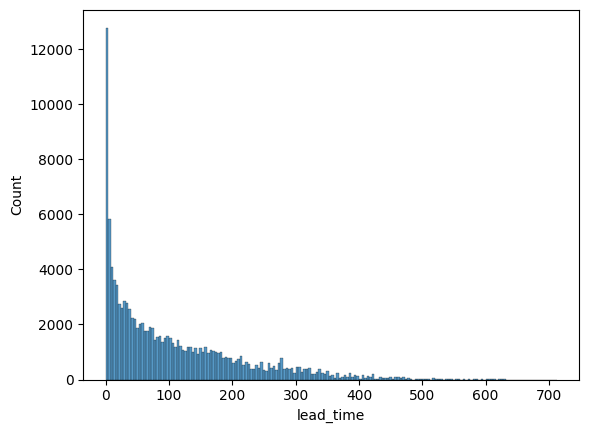

In [280]:
df4 = df3.copy()
sns.histplot(x = df4["lead_time"], binwidth= 4)

It can be seen that the lead time has a skewed distribution, but there is still no visible maximum limit for the lead time.

In [304]:
print("The minimum limit is {} and the maximum is {} of lead time".format(min(df4.lead_time), max(df4.lead_time)))

The minimum limit is 0 and the maximum is 709 of lead time


You can be sure that the value of lead time is too much, so to make visualization easier, categorization will be carried out

In [305]:

df4["lead_time_group"] = df4["lead_time"].apply(lambda x: 
                                            '1' if x <= 30 else 
                                             ('2' if x <=  60 else 
                                              ('3' if x <= 90 else
                                               ('4' if x <= 120 else 
                                                ('5'if x <= 150 else
                                                 ('6' if x <= 180 else
                                                  ('7' if x <= 210 else
                                                   ('8' if x <= 240 else 
                                                    ('9' if x <= 270 else
                                                     '10' if x <= 300 else
                                                     ('11' if x <= 330 else 
                                                      ('12' if x <= 360 else "> 1 year")
                                                      ))))))))))

print("results from the lead time category, {}".format(df4.lead_time_group.value_counts()))


results from the lead time category, lead_time_group
1           37247
2           16808
3           12485
4           10385
5            8098
6            7820
7            5634
8            4289
10           3407
> 1 year     3396
9            3386
11           2740
12           1699
Name: count, dtype: int64


In [306]:
df4.lead_time_group = pd.Categorical(df4.lead_time_group,
                                     categories=['1', '2', '3', '4', '5', '6', '7',
                                                  '8', '9', '10', '11', '12', '> 1 year'] )

df_group2 = df4.groupby(["hotel","lead_time_group"]).agg({"is_canceled": "sum", 
                                                          "lead_time" : "count"}).reset_index()

df_group2["lead_time_cancel_rate"] = round(df_group2["is_canceled"] / df_group2["lead_time"] *100)
df_group2


,hotel,lead_time_group,is_canceled,lead_time,lead_time_cancel_rate
0,City Hotel,1,5111,22401,23.0
1,City Hotel,2,4598,11800,39.0
2,City Hotel,3,3684,8850,42.0
3,City Hotel,4,3486,7424,47.0
4,City Hotel,5,2538,5586,45.0
5,City Hotel,6,2711,5147,53.0
6,City Hotel,7,1791,3582,50.0
7,City Hotel,8,1280,2499,51.0
8,City Hotel,9,1233,2105,59.0
9,City Hotel,10,1859,2512,74.0


Text(-1, 102, 'When a city hotel has a waiting time longer than ten months, the cancellation rate may reach over 73%.')

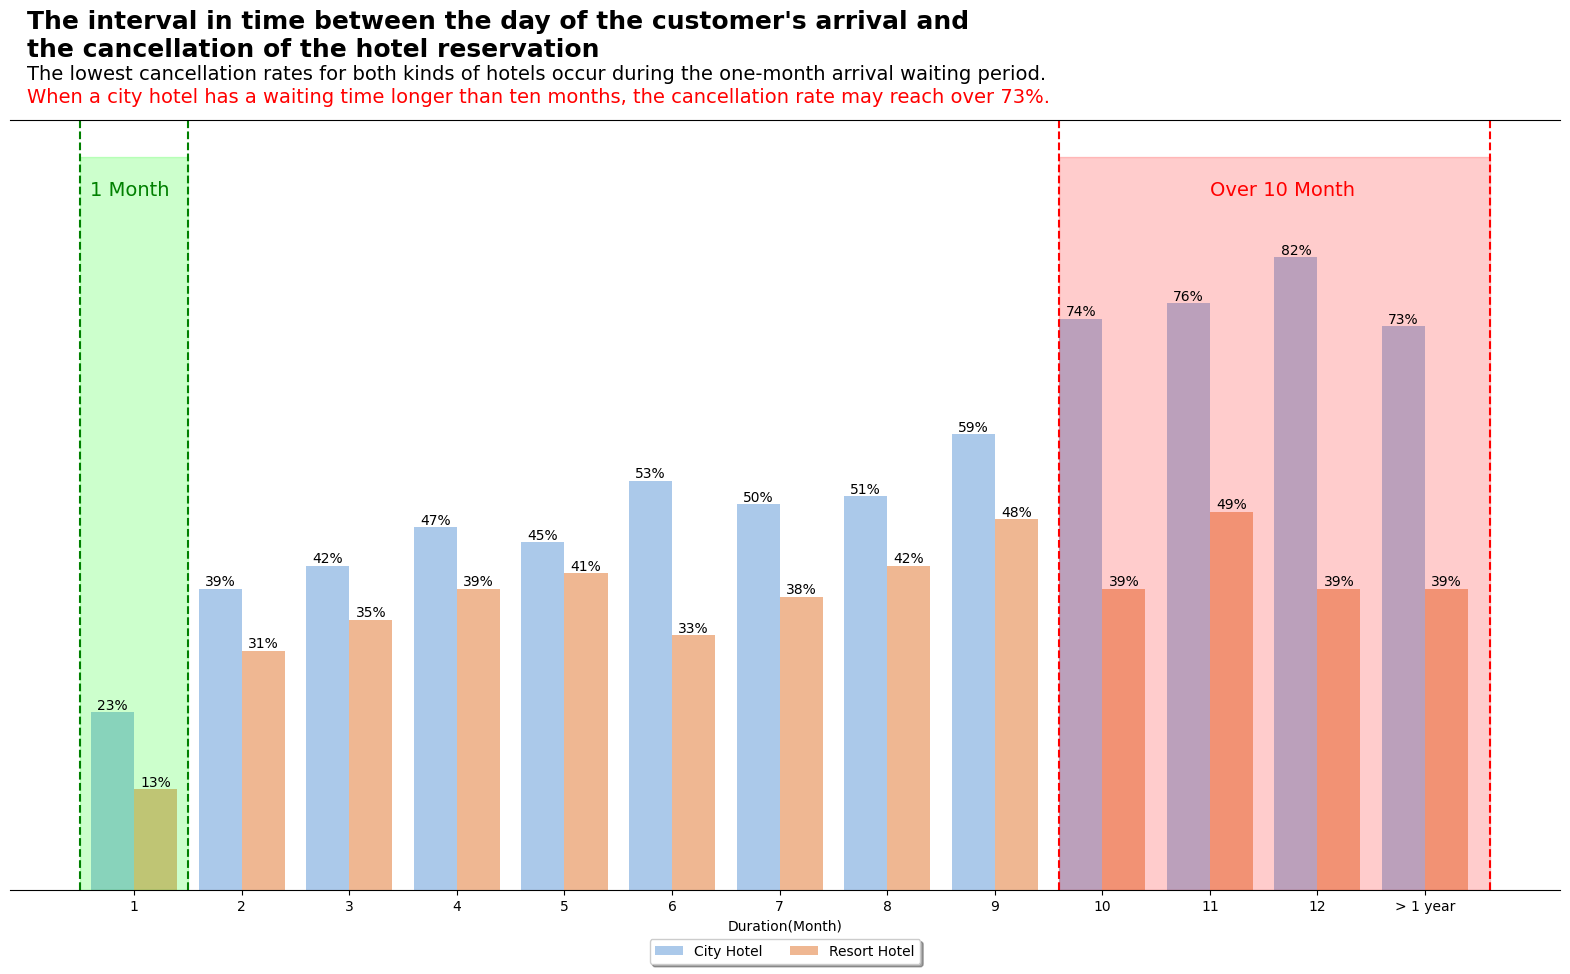

In [287]:
plt.figure(figsize= (20,10))
plt.style.use("default")

ax = sns.barplot(x = df_group2['lead_time_group'], y = df_group2['lead_time_cancel_rate'], hue=df_group2['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=sns.color_palette("pastel"))

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.ylabel("")
plt.yticks([])
plt.xlabel("Duration(Month)")
plt.legend(loc='center', bbox_to_anchor=(0.50, -0.08),
          fancybox=True, shadow=True, ncol=5)

ax.axvline(-0.5, ls='--', color='green')
ax.axvline(0.5, ls='--', color='green')
ax.stackplot(np.arange(-0.5,0.6),[[95]], color='lime', alpha=0.2)
ax.text(x=-0.41, y=90, s='1 Month', fontsize=14, color='green')

ax.axvline(8.6, ls='--', color='red')
ax.axvline(12.6, ls='--', color='red')
ax.stackplot(np.arange(8.6,12.7),[[95]], color='red', alpha=0.2)
ax.text(x= 10, y=90, s='Over 10 Month', fontsize=14, color='red')
for i in ax.containers :
    ax.bar_label(i, fmt = '%.f%%')

ax.text(x=-1, y=108, s="The interval in time between the day of the customer's arrival and\nthe cancellation of the hotel reservation", fontsize=18, fontweight='bold')
ax.text(x=-1, y=105, s="The lowest cancellation rates for both kinds of hotels occur during the one-month arrival waiting period.", fontsize=14)
ax.text(x=-1, y=102, s="When a city hotel has a waiting time longer than ten months, the cancellation rate may reach over 73%.", fontsize=14, color = "red")

- The graph illustrates that, within a month of arrival, these two categories of hotels have the lowest cancellation rates.
- Waiting for customers who have more than a 10-month arrival date isn't recommended since the above graph illustrates that the city hotel cancellation rate may go over 73%.
- When it comes to cancellation rates, resort hotels have the most consistent rate, at about 40% per month.
- The maximum waiting period for reservations should be set at one month by hotel management as a measure against consumers who could forget whether they have ever booked a hotel with an extremely long waiting period. Setting a maximum waiting period limit for guests is highly suggested, as it can be observed that a one-month waiting period has the lowest cancellation rate.

## Conclusion

Business Question :
_______

What types of hotels do customers visit most often?
- 66.5% of bookings are for city hotels, while just 33.5% are for resort hotels. For the first holiday season, from May to June, there was an increase in bookings during the second holiday season, it happened from November to December.
- There is always a decrease in customer orders while the kids are in school.

Does the duration of stay have an impact on hotel cancellation rates?
- According to the graph, booking cancellations affect the length of stay for example, if a guest stays longer than a month, almost 95% of city hotels encounter booking cancellations.

Does the amount of time that passes between making a reservation and the day the guest comes have an impact on how often reservations are canceled?
- It is clear from the displayed graph that the duration of time visitors must wait to arrive affects the number of hotel cancellations. For this reason, it is strongly advised to establish a policy that sets a maximum waiting period of one month, since this has the lowest cancellation rate.



## Business Recomendation

The following businesses can be recommended based on the visualization and insights obtained:
1. To lower the rate of cancellations, hotels may set a policy on visitors who cancel their reservations through the penalty system.
2. To lower cancellation rates, hotels can set up a maximum time period or booking interval of no more than one month.
3. Provide a system of message reminders for orders that need a lengthy ordering process.
4. Hotel management can hold events at specific times during the year, such as in June and November/December.
5. In order to increase revenue during school days, hotel staff can collaborate with EO/WO to host events and provide a ballroom and restaurant for enthusiastic guests who frequently visit the hotel.